# ENCUESTA NACIONAL DE EMPLEO - ENE
## Analisis trimestral  - 2018 - 01


### DataSet
http://www.ine.cl/estadisticas/laborales/ene/base-de-datos
- Original data on SPSS (.SAV) format converted to .CSV using "R"

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
!ls *.csv

ENE_2018_01_DEF.csv ENE_2018_02_EFM.csv ENE_2018_03_FMA.csv ENE_2018_04_MAM.csv


In [4]:
# Load dataset
df = pd.read_csv('ENE_2018_01_DEF.csv', error_bad_lines=False, warn_bad_lines=False)
df.shape # (76796, 144)

(76796, 144)

In [5]:
df.head()

,id_directorio,id_identificacion,region,r_p_c,ano_trimestre,mes_central,ano_encuesta,mes_encuesta,estrato,tipo,...,cae_general,cae_especifico,categoria_ocupacion,habituales,efectivas,cine,fact,r_p_rev4cl_caenes,sector,ocup_form
1,7138,230969,Tarapacá,Iquique,2018,Diciembre-Febrero,2018,Enero,1021,CD,...,Inactivos que no buscaron trabajo ni estuviero...,Razones de jubilación (Habitual),No corresponde,NaN,NaN,Educación Técnica (Educación Superior no unive...,43.6178,NaN,0,0
2,7138,230969,Tarapacá,Iquique,2018,Diciembre-Febrero,2018,Enero,1021,CD,...,Inactivos que no buscaron trabajo ni estuviero...,Razones de jubilación (Habitual),No corresponde,NaN,NaN,Educación secundaria,43.7061,NaN,0,0
6,7138,231771,Tarapacá,Iquique,2018,Diciembre-Febrero,2018,Enero,1021,CD,...,Menor de quince años,Menor de quince años,No corresponde,NaN,NaN,Educación primaria (nivel 1),41.0113,NaN,0,0
8,7138,230975,Tarapacá,Iquique,2018,Diciembre-Febrero,2018,Enero,1021,CD,...,Inactivos que no buscaron trabajo ni estuviero...,Sin deseo de trabajar,No corresponde,NaN,NaN,Educación Técnica (Educación Superior no unive...,43.7061,NaN,0,0
9,7138,230975,Tarapacá,Iquique,2018,Diciembre-Febrero,2018,Enero,1021,CD,...,Inactivos que no buscaron trabajo ni estuviero...,Razones de estudio (Habitual),No corresponde,NaN,NaN,Educación secundaria,43.7061,NaN,0,0


### Viewing dataset

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76796 entries, 1 to 102812
Data columns (total 144 columns):
id_directorio          int64
id_identificacion      int64
region                 object
r_p_c                  object
ano_trimestre          int64
mes_central            object
ano_encuesta           int64
mes_encuesta           object
estrato                int64
tipo                   object
hogar                  int64
nro_linea              int64
edad                   int64
parentesco             object
sexo                   object
curso                  object
nivel                  object
termino_nivel          object
est_conyugal           object
proveedor              object
nacionalidad           object
a1                     object
a2                     object
a3                     object
a4                     object
a5                     object
a6                     object
a6_otro                object
a7                     object
a8                     obje

In [7]:
for col in df:
    print ('\n', col)
    print (df[col].unique())


 id_directorio
[ 7138  8700 13886 ... 22939 24113 25136]

 id_identificacion
[230969 231771 230975 ... 256599 257327 256603]

 region
['Tarapacá' 'Antofagasta' 'Atacama' 'Coquimbo' 'Valparaíso' 'O´Higgins'
 'Maule' 'Biobío' 'La Araucanía' 'Los Lagos' 'Aysén' 'Magallanes'
 'Metropolitana' 'Los Ríos' 'Arica y Parinacota']

 r_p_c
['Iquique' 'Pica' 'Pozo Almonte' 'Alto Hospicio' 'Antofagasta' 'Calama'
 'Mejillones' 'Tocopilla' 'Chañaral' 'Copiapó' 'Tierra Amarilla' 'Caldera'
 'Huasco' 'Vallenar' 'Alto del Carmen' 'Coquimbo' 'La Serena' 'Vicuña'
 'Andacollo' 'Paiguano' 'Ovalle' 'Monte Patria' 'Río Hurtado' 'Canela'
 'Los Vilos' 'Salamanca' 'Illapel' 'La Ligua' 'Zapallar' 'Los Andes'
 'Calle Larga' 'San Esteban' 'Rinconada' 'Panquehue' 'San Felipe'
 'Santa María' 'Putaendo' 'Catemu' 'Quillota' 'Hijuelas' 'Valparaíso'
 'Viña del Mar' 'Quilpué' 'Villa Alemana' 'Casablanca' 'San Antonio'
 'El Quisco' 'Algarrobo' 'La Calera' 'La Cruz' 'Concón'
 'Olmué_duplicated_5803' 'Limache_duplicated_5802'


 c1
[nan 'Región de Atacama' 'No' 'Copiapó' 'Caldera' 'Tierra Amarilla'
 'Freirina' 'Región de Antofagasta' 'Huasco' 'Alto del Carmen' 'Vallenar'
 'Región de Coquimbo' 'Coquimbo' 'La Serena' 'Sí' 'Alhué'
 'Región de Tarapacá' 'Vicuña' 'La Higuera' 'Paiguano' 'Punitaqui'
 'Ovalle' 'Santiago' 'Monte Patria' 'Combarbalá' 'Canela' 'Los Vilos'
 'Salamanca' 'Illapel' 'Región de Valparaiso' 'La Ligua' 'Cabildo'
 'Petorca' 'Los Andes' 'Región Metropolitana' 'Papudo' 'San Felipe'
 'Taltal' 'Rinconada' 'San Esteban' 'Calle Larga' 'Putaendo' 'Tiltil'
 'Lampa' 'Llaillay' 'Pudahuel' 'Puchuncaví' 'Quillota' 'Viña del Mar'
 'La Calera' 'Nogales' 'Limache_duplicated_5802' 'Región del Bio Bío'
 'Valparaíso' 'San Antonio' 'Vitacura' 'Buin' 'Providencia' 'Antofagasta'
 'Quilpué' 'Villa Alemana' 'Quintero' 'Concón' 'Algarrobo'
 "Región del Libertador Gral Bernardo O'higgins" 'Cartagena'
 'Santo Domingo' 'Calama' 'Olmué_duplicated_5803' 'Rancagua' 'Doñihue'
 'Requínoa' 'Codegua' 'Graneros' 'Coltauco' 'Ren

### DataSet general overview:
- Columns up to "nacionalidad" are social-economic data regarding samples
- Columns from 'a_n' to 'e_n' are data collect from questionary's answers
- Column "cae_general" seems to be the "conclusion" regarding why a person is not ocupied

In [8]:
df.cae_general.value_counts()

Inactivos que no buscaron trabajo ni estuvieron disponibles para trabajar                                                                                                                                                                                          20925
Menor de quince años                                                                                                                                                                                                                                               19668
                                                                                                                                                                                                                                                                    3642
Inactivos que estuvieron disponibles para trabajar                                                                                                                                                           

In [9]:
df.region.value_counts()
# 15 regions

Metropolitana         19393
Biobío                10991
Valparaíso            10197
Maule                  4733
Los Lagos              4677
O´Higgins              4401
Coquimbo               4372
La Araucanía           4295
Arica y Parinacota     2754
Los Ríos               2192
Antofagasta            2166
Tarapacá               2142
Atacama                1958
Aysén                  1617
Magallanes              908
Name: region, dtype: int64

In [10]:
df.r_p_c.value_counts().head()
# 276 cities

Arica           2750
San Bernardo    1661
Concepción      1594
Puente Alto     1512
Coronel         1406
Name: r_p_c, dtype: int64

In [11]:
df.mes_encuesta.value_counts()

Diciembre    32643
Febrero      29121
Enero        15032
Name: mes_encuesta, dtype: int64

### Numerical Analysis

In [12]:
POP = len(df.edad)
print ("Total Population:", POP, '\n')

Total Population: 76796 



In [13]:
df.edad.describe()

count    76796.000000
mean        35.675348
std         24.351493
min          0.000000
25%         14.000000
50%         32.000000
75%         56.000000
max        106.000000
Name: edad, dtype: float64

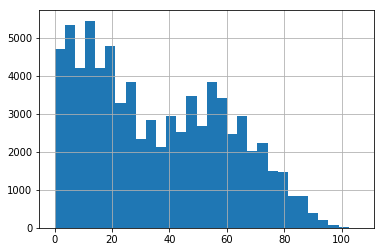

In [14]:
df.edad.hist(bins=30)

In [15]:
df_15 = df[df.edad >=15]
PET = len(df_15)
print ("Total Chilean Population over 15 years (PET):", PET, '\n')

Total Chilean Population over 15 years (PET): 57128 



In [16]:
print ("Pop potential over total: {}% \n".format(round(PET/POP, 2)*100))

Pop potential over total: 74.0% 



### Working with Questionary

<img src="Sit_Lab.png">

Main Questions:
- Question A1:  Did you work at least 1 hour last week?
- Question A2:  Did you make any deal that resulted as work?
- Question A3:  Will you make money with this work?
- Question A5:  Even if not worked, did yoy have any other paid activity?
- Question E1:  Did you try to get a work on the last 12 months?
- Question E2:  Did you try to get a work on the last 4 weeks?

In [17]:
df_ocupados = df_15[df_15.a1 == 'Sí']
df_ocupados.shape

(20316, 144)

In [18]:
df_ocupados = df_ocupados[df_ocupados.a3 == 'Sí']
df_ocupados.shape

(20077, 144)

In [19]:
df_not_ocup = df_15[df_15.a1 == 'No']
df_not_ocup.shape

(34354, 144)

In [20]:
df_not_ocup = df_not_ocup[df_not_ocup.a2 == 'No']
df_not_ocup.shape

(33789, 144)

In [21]:
df_ocup_aus = df_not_ocup[df_not_ocup.a5 == 'Sí']
df_ocup_aus.shape

(2574, 144)

In [22]:
r = 'Inactivos que no buscaron trabajo ni estuvieron disponibles para trabajar'
df_inativos = df_15[df_15.cae_general == r]
df_inativos.shape

(20925, 144)

In [23]:
r = 'Inactivos que estuvieron disponibles para trabajar'
df_desocupados = df_15[df_15.cae_general == r]
df_desocupados.shape

(2740, 144)

In [24]:
r = 'Cesante'
df_cesantes = df_15[df_15.cae_general == r]
df_cesantes.shape

(913, 144)

In [25]:
POP_OCUP = len(df_ocupados) + len(df_ocup_aus)
print ("Total Chilean Population over 15 years working:", POP_OCUP)

Total Chilean Population over 15 years working: 22651


In [26]:
POP_INAT = len(df_inativos) +len(df_cesantes)
print ("Total Chilean Population over 15 years Inactive :", POP_INAT)

Total Chilean Population over 15 years Inactive : 21838


In [27]:
PEA = PET - POP_INAT
print ("Total Chilean Population Economic active:", PEA)

Total Chilean Population Economic active: 35290


In [28]:
POP_DESOCUP = len(df_desocupados)
print ("Total Chilean Population over 15 years w/o job:", POP_DESOCUP)

Total Chilean Population over 15 years w/o job: 2740


In [29]:
TD = POP_DESOCUP/POP_OCUP
print ("Tasa de Desempleo: {}% \n".format(round(TD, 3)*100))

Tasa de Desempleo: 12.1% 



### Regional Analysis

In [30]:
df.region.value_counts()
# 15 regions

Metropolitana         19393
Biobío                10991
Valparaíso            10197
Maule                  4733
Los Lagos              4677
O´Higgins              4401
Coquimbo               4372
La Araucanía           4295
Arica y Parinacota     2754
Los Ríos               2192
Antofagasta            2166
Tarapacá               2142
Atacama                1958
Aysén                  1617
Magallanes              908
Name: region, dtype: int64

In [31]:
REGION = 'Metropolitana'

df_des_reg = df_desocupados[df_desocupados.region == REGION]
df_ces_reg = df_cesantes[df_cesantes.region == REGION]
df_ocup_reg = df_ocupados[df_ocupados.region == REGION]
df_ocup_aus_reg = df_ocup_aus[df_ocup_aus.region == REGION]

POP_OCUP_REG = len(df_ocup_reg) + len(df_ocup_aus_reg)
POP_DESOCUP_REG = len(df_des_reg) + len(df_ces_reg)
TD_REG = round(POP_DESOCUP_REG/POP_OCUP_REG, 3)*100

print ("Region:", REGION )
print ("\nRegional Population over 15 years working:", POP_OCUP_REG)
print ("Regional Population over 15 years w/o job: ", POP_DESOCUP_REG)
print ("Tasa de Desempleo Regional:                {}%".format(TD_REG))

Region: Metropolitana

Regional Population over 15 years working: 6591
Regional Population over 15 years w/o job:  685
Tasa de Desempleo Regional:                10.4%


In [32]:
REGION = 'Atacama'

df_des_reg = df_desocupados[df_desocupados.region == REGION]
df_ces_reg = df_cesantes[df_cesantes.region == REGION]
df_ocup_reg = df_ocupados[df_ocupados.region == REGION]
df_ocup_aus_reg = df_ocup_aus[df_ocup_aus.region == REGION]

POP_OCUP_REG = len(df_ocup_reg) + len(df_ocup_aus_reg)
POP_DESOCUP_REG = len(df_des_reg) + len(df_ces_reg)
TD_REG = round(POP_DESOCUP_REG/POP_OCUP_REG, 3)*100

print ("Region:", REGION )
print ("\nRegional Population over 15 years working:", POP_OCUP_REG)
print ("Regional Population over 15 years w/o job: ", POP_DESOCUP_REG)
print ("Tasa de Desempleo Regional:                {}%".format(TD_REG))

Region: Atacama

Regional Population over 15 years working: 429
Regional Population over 15 years w/o job:  74
Tasa de Desempleo Regional:                17.2%


In [33]:
REGION = 'Los Lagos'

df_des_reg = df_desocupados[df_desocupados.region == REGION]
df_ces_reg = df_cesantes[df_cesantes.region == REGION]
df_ocup_reg = df_ocupados[df_ocupados.region == REGION]
df_ocup_aus_reg = df_ocup_aus[df_ocup_aus.region == REGION]

POP_OCUP_REG = len(df_ocup_reg) + len(df_ocup_aus_reg)
POP_DESOCUP_REG = len(df_des_reg) + len(df_ces_reg)
TD_REG = round(POP_DESOCUP_REG/POP_OCUP_REG, 3)*100

print ("Region:", REGION )
print ("\nRegional Population over 15 years working:", POP_OCUP_REG)
print ("Regional Population over 15 years w/o job: ", POP_DESOCUP_REG)
print ("Tasa de Desempleo Regional:                {}%".format(TD_REG))

Region: Los Lagos

Regional Population over 15 years working: 1484
Regional Population over 15 years w/o job:  126
Tasa de Desempleo Regional:                8.5%
